# 0.概述
模型的好坏是相对的。什么样的模型是好的，即取决于算法和数据，也取决于任务需求。
# 1. 回归任务的性能度量
## 均方误差
均方误差是回归任务最常用的性能度量，表示预测值和实际值之间的误差。
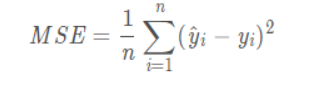
# 2. 分类任务的性能度量
| 真实情况 | 预测结果   |            |
| :------- | :--------- | :--------- |
|          | 正例       | 反例       |
| 正例     | TP(真正例) | FN(假反例) |
| 反例     | FP(假正例) | TN(真反例) |
**精度**：分类正确的样本占总样本的比例 TP+FN/总例数
**查准率**：预测正确的样本中实际为正确的比例 TP/(TP+FP)
**查全率**：正例中预测正确的比例 TP/(TP+FN)
**F1**：查准率和查全率的平均
**ROC与AUC**
许多机器学习方法分类的方式是为测试样本产生一个实值(或概率预测)，并将其与设定好的阈值相比较，大于阈值的分为正类，小于阈值的分为负类。我们可以根据实值的大小，即按是正例的可能性将样本进行排序。分类过程就是在这个排序中找到某个“截断点”将前面一部分判做正例，后面一部分判做反例。
ROC曲线是以每一个实值作为阈值，并衡量模型性能的方法。它以真正例率TPR=TP/(TP+FN)为横坐标，假正例率FPR=FP/(TN+FP)为横坐标。每次按顺序尝试一个实值作为阈值进行测试。
真正例率和反正例率的分母是实际的正例和反例数量，是一个固定的数，因此他们与TP和FP成正比。
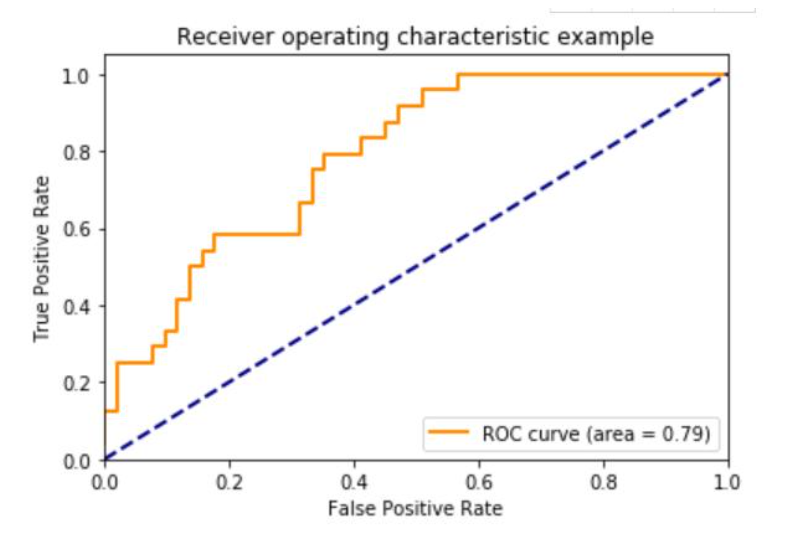
上图是ROC的一个示例。点（0，1）对应将所有正例划分在反例前面的理想模型。橙色线对应一条实际情况下的ROC曲线。开始时，阈值的取值较高，只有前几个数作为正例，假正例数量为0，假正例率为0。随着阈值的降低，更多的样本被划分为正例，真假正例的数量都在增多，真假正例率也均有提升。阈值增高到一定程度时，排序靠后的样本全部为实际反例。于是真正例率不再增加，反正例率逐渐增加至1。得到一个数列fpr,tpr可以使用sklearn.metrics中的
`roc_curve([实际结果]，[分数])`
AUC是ROC曲线的线下面积，衡量了预测的排序质量，是一种综合性指标。AUC=1时，ROC曲线是(0, 0), (0, 1), (1, 1)连接起来的折线，代表所有正例在反例之前的完美排序。AUC=接近1/2时，ROC接近(0, 0)和(1, 1)连接起来的直线，代表排序的方式接近于完全随机。计算auc的方法是应用sklearn.metrics中的`roc_auc([fpr],[tpr])`
**代价敏感错误率**
适用于错误类型造成的后果不同，如患者诊断为健康人（错过治疗）和健康人诊断为患者（检查费用）
根据错误类型的不同给FP和FN按一定比例相加除以样例数即为代价敏感错误率。
# 3. 代码示例
画出ROC曲线，计算AUC值

In [3]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
# 导入鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target
# 二进制化输出
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)
# 应用SVM进行评分
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# 为每个类别计算ROC曲线和AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # 这里用roc_curve得到了每个点的fpr,tpr值，参数是测试样本实际结果和评分的的第i列
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    # 这里用auc函数得到每个点的auc
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
lw = 2
# 画出ROC曲线，标出AUC值
plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

<Figure size 432x288 with 1 Axes>

# 参考资料：

《机器学习》周志华

sk-learn官方文档

# 作业：

画出乳腺癌数据集的roc曲线并计算auc值

In [2]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
# 导入乳腺癌数据集
data = datasets.load_breast_cancer()
X = data.data
y = data.target
# 切分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)
# 应用SVM进行评分
# 为每个类别计算ROC曲线和AUC
# 画出ROC曲线